<a href="https://colab.research.google.com/github/HIDDENDEN/InverseProblem/blob/main/InverseProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing functions


In [ ]:
!cp "drive/My Drive/Science_res/InverseProblem/At.py" .
import At

!cp "drive/My Drive/Science_res/InverseProblem/Betax.py" .
import Betax

!cp "drive/My Drive/Science_res/InverseProblem/Ht.py" .
import Ht

!cp "drive/My Drive/Science_res/InverseProblem/Kcit.py" .
import Kcit

In [ ]:
pip install findiff

Importing libs

In [ ]:
import numpy as np
np.set_printoptions(linewidth=np.inf)# no extra newlines in output

import math


# define operator
from findiff import FinDiff

from copy import deepcopy

# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  

Initialize functions

In [ ]:
a_t = At.A_t()
kci_t = Kcit.Kci_t()
beta_x = Betax.Beta_x()
h_t_func = Ht.H_t()

Set steps size of X axys and T axys
And x_0 , t_0

In [ ]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_t = 10
L = 1
T = 1
N_x = 100
N_t = 100

h_x_axys = L/N_x
h_t_axys = T/N_t

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

### *Tools*

**1.1) Inverse beta(x)**

Setting grids

beta_x_grid


In [ ]:
# x_grid range = x_grid_length   x_grid = [-1/2 * x_grid_length ; 1/2 * x_grid_length]
beta_x_grid_range = 100

beta_x_grid_length = beta_x_grid_range * 2 #for minus values

beta_x_grid_length_for_array_implementation = beta_x_grid_length + 1
beta_x_grid = np.zeros(beta_x_grid_length_for_array_implementation)
for j in range(beta_x_grid_length_for_array_implementation):

  beta_x_grid[j] = j - (1/2) * beta_x_grid_length

print (beta_x_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

beta_y_grid

In [ ]:
# y_grid range = y_grid_length   y_grid = [-1/2 * y_grid_length ; 1/2 * y_grid_length]
beta_y_grid_range = 100

beta_y_grid_length = beta_y_grid_range * 2

beta_y_grid_length_for_array_implementation = beta_y_grid_length + 1
beta_y_grid = np.zeros(beta_y_grid_length_for_array_implementation)
for j in range(beta_y_grid_length_for_array_implementation):

  beta_y_grid[j] = j - (1/2) * beta_y_grid_length

print (beta_y_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

Fill the grid with function values of Beta(x)

In [ ]:
# our y values will be structure elements = [cur value ; argument that entered that cur value]
class beta_x_struct:

    def __init__(self, beta_value , arg_value):
      self.beta_value = beta_value
      self.arg_value = arg_value

    def get_beta_value(self):
      return self.beta_value

    def get_arg_value(self):
      return self.arg_value
    
    def __str__(self):
      return "[ "+str(self.beta_value) + " || " + str(self.arg_value) + " ];"

In [ ]:
#uncounted values will be set as np.NaN

#fi_u(x) values will be strored as a structure = {grid_value ; x that gave that result}

init_array_struct = beta_x_struct(0.,0.)

beta_x_values_grid  = np.empty(shape=(beta_x_grid_length_for_array_implementation,), dtype=object)

for j in range(beta_x_grid_length_for_array_implementation):
  arg = beta_x_grid[j]
  beta_value = beta_x.compute(arg)

  beta_x_values_grid[j] = beta_x_struct(beta_value , arg)

# for j in range(beta_x_grid_length_for_array_implementation):
#   print (beta_x_values_grid[j])


Sorting beta_x_values grid by func values in ascending order

In [ ]:
list1 = beta_x_values_grid.tolist()
list1.sort(key = lambda x: x.get_beta_value(), reverse=False)
# for j in range(x_grid_length_for_array_implementation):
#   print (list1[j])

beta_x_value_grid=np.array(list1)
# for j in range(x_grid_length_for_array_implementation):
#   print (fi_u_grid[j])

Compute inverse function for beta(x)

In [ ]:
def search_left_index_beta_x_values_grid(value):
  for i in range(len(beta_x_value_grid)):
    if (beta_x_value_grid[i].get_beta_value() <= value):# [ * | | value | | | |]
      if ((i+1)<len(beta_x_value_grid)):# i not the right side of array
        if (beta_x_value_grid[i+1].get_beta_value() < value):
          continue
        else:
          return i
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_beta_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_beta_x_values LEFT SIDE')


In [ ]:
def compute_weight(value, our_point, whole_dist_between_border_points):
  return ( (abs(value - our_point)) / whole_dist_between_border_points)

In [ ]:
def inverse_beta(y_0):
  left_index = search_left_index_beta_x_values_grid(y_0)

  #search left and right side distance ftom y_0   ---> this will form an impact that left and right points enter
  left_point_value = beta_x_value_grid[left_index].get_beta_value()
  right_point_value = beta_x_value_grid[left_index + 1].get_beta_value()

  whole_dist_between_border_points = abs(right_point_value - left_point_value)

  #compute weights
  left_side_weight = compute_weight(y_0,left_point_value,whole_dist_between_border_points)

  right_side_weight = compute_weight(y_0,right_point_value,whole_dist_between_border_points)

  #compute return value
  arg1 = beta_x_value_grid[left_index].get_arg_value()
  weight_arg1 = (1 - left_side_weight)

  arg2 = beta_x_value_grid[left_index + 1].get_arg_value()
  weight_arg2 = (1 - right_side_weight)

  return weight_arg1 * arg1   +  weight_arg2 * arg2


In [ ]:
print(inverse_beta(5))

-3.0


**1.2) Inverse h(t)**

h(t)_x_grid

In [ ]:
# x_grid range = x_grid_length   x_grid = [-1/2 * x_grid_length ; 1/2 * x_grid_length]
h_t_x_grid_range = 100

h_t_x_grid_length = h_t_x_grid_range * 2 #for minus values

h_t_x_grid_length_for_array_implementation = h_t_x_grid_length + 1
h_t_x_grid = np.zeros(h_t_x_grid_length_for_array_implementation)
for j in range(h_t_x_grid_length_for_array_implementation):

  h_t_x_grid[j] = j - (1/2) * h_t_x_grid_length

print (h_t_x_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

h(t)_y_grid

In [ ]:
# y_grid range = y_grid_length   y_grid = [-1/2 * y_grid_length ; 1/2 * y_grid_length]
h_t_y_grid_range = 100

h_t_y_grid_length = h_t_y_grid_range * 2

h_t_y_grid_length_for_array_implementation = h_t_y_grid_length + 1
h_t_y_grid = np.zeros(h_t_y_grid_length_for_array_implementation)
for j in range(h_t_y_grid_length_for_array_implementation):

  h_t_y_grid[j] = j - (1/2) * h_t_y_grid_length

print (h_t_y_grid)

[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   6

Fill the grid with function values of h_t(x)

In [ ]:
# our y values will be structure elements = [cur value ; argument that entered that cur value]
class h_t_struct:

    def __init__(self, h_t_value , arg_value):
      self.h_t_value = h_t_value
      self.arg_value = arg_value

    def get_h_t_value(self):
      return self.h_t_value

    def get_arg_value(self):
      return self.arg_value
    
    def __str__(self):
      return "[ "+str(self.h_t_value) + " || " + str(self.arg_value) + " ];"

In [ ]:
#uncounted values will be set as np.NaN

#fi_u(x) values will be strored as a structure = {grid_value ; x that gave that result}

init_array_struct = h_t_struct(0.,0.)

h_t_x_values_grid  = np.empty(shape=(h_t_x_grid_length_for_array_implementation,), dtype=object)

for j in range(h_t_x_grid_length_for_array_implementation):
  arg = h_t_x_grid[j]
  h_t_value = h_t_func.compute(arg)

  h_t_x_values_grid[j] = h_t_struct(h_t_value , arg)

# for j in range(beta_x_grid_length_for_array_implementation):
#   print (beta_x_values_grid[j])


Sorting h_x_values grid by func values in ascending order

In [ ]:
list1 = h_t_x_values_grid.tolist()
list1.sort(key = lambda x: x.get_h_t_value(), reverse=False)
# for j in range(x_grid_length_for_array_implementation):
#   print (list1[j])

h_t_x_value_grid=np.array(list1)
# for j in range(h_t_x_grid_length_for_array_implementation):
#   print(j)
#   print(h_t_x_value_grid[j].get_h_t_value())
#   print (h_t_x_value_grid[j])


Compute inverse function for h(t)

In [ ]:
def search_left_index_h_t_x_values_grid(value):
  for i in range(len(h_t_x_value_grid)):
    # print("i= "+str(i)+" ; "+str(h_t_x_value_grid[i].get_h_t_value()) + "  ;value = " + str(value))
    # if (h_t_x_value_grid[i].get_h_t_value() > value):
      # print("what?")
    if (h_t_x_value_grid[i].get_h_t_value() <= value):# [ * | | value | | | |]
      if ((i+1)<len(h_t_x_value_grid)):# i not the right side of array
        if (h_t_x_value_grid[i+1].get_h_t_value() < value):
          continue
        else:
          return i
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_h_t_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_h_t_x_values LEFT SIDE')


In [ ]:
def compute_weight(value, our_point, whole_dist_between_border_points):
  return ( (abs(value - our_point)) / whole_dist_between_border_points)

In [ ]:
def inverse_h_t(y_0):
  left_index = search_left_index_h_t_x_values_grid(y_0)

  #search left and right side distance ftom y_0   ---> this will form an impact that left and right points enter
  left_point_value = h_t_x_value_grid[left_index].get_h_t_value()
  right_point_value = h_t_x_value_grid[left_index + 1].get_h_t_value()

  whole_dist_between_border_points = abs(right_point_value - left_point_value)

  #compute weights
  left_side_weight = compute_weight(y_0,left_point_value,whole_dist_between_border_points)

  right_side_weight = compute_weight(y_0,right_point_value,whole_dist_between_border_points)

  #compute return value
  arg1 = h_t_x_value_grid[left_index].get_arg_value()
  weight_arg1 = (1 - left_side_weight)

  arg2 = h_t_x_value_grid[left_index + 1].get_arg_value()
  weight_arg2 = (1 - right_side_weight)

  return weight_arg1 * arg1   +  weight_arg2 * arg2


In [ ]:
print(inverse_h_t(1))

0.0


**2) Beta derivative  ( beta'(x) )**

In [ ]:
segment_len = beta_x_grid_length
start_x = (-1) * beta_x_grid_range
h_x=0.01
array_len = int(segment_len/h_x) + 1


x = np.arange(start_x, start_x + (segment_len) + h_x, h_x)
print(x)
print(len(x))
y=np.zeros(array_len)

for i in range(array_len):
  y[i]=beta_x.compute(x[i])
print(y)
print(len(y))

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001
[102.   101.99 101.98 ... -97.98 -97.99 -98.  ]
20001


In [ ]:
d_dx = FinDiff(0,x,1)

In [ ]:
x_derivate_array = deepcopy(x)
d_beta_dx = d_dx(y)
print(x_derivate_array)
print(d_beta_dx)

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
[-1. -1. -1. ... -1. -1. -1.]


Function calculate derivative ( beta'(x) )

In [ ]:
def find_index(x_array,value):
  for i in range(len(x_array)):
    if (x_array[i] <= value):# [ * | | value | | | |]
      if ((i+1)<len(x_array)):# i not the right side of array
        if (x_array[i+1] < value):
          continue
        else:
          return i + 1
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_beta_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_beta_x_values LEFT SIDE')

In [ ]:
def round_value(step):
  value = int(1/step)
  cnt = 0
  while (value>1):
    cnt +=1
    value = value // 10
  return cnt

In [ ]:
def beta_derivative(point):
  final_point = round(point, round_value(h_x))
  index = find_index(x_derivate_array,final_point) 
  return d_beta_dx[index]
  

In [ ]:
print(beta_derivative(3))

-1.0


**3.1) h'(t) derivative  ( h'(t) )**

In [ ]:
grid_range_h_t = 100
grid_len_h_t = 2 * grid_range_h_t
segment_len_h_t = grid_len_h_t
start_t = (-1) * grid_range_h_t
h_t_derivative_step = 0.01
array_len_h_t_args = int(segment_len_h_t/h_t_derivative_step) + 1

In [ ]:
t_args = np.arange(start_t, start_t + (segment_len_h_t) + h_t_derivative_step, h_t_derivative_step)
print(t_args)
print(len(t_args))

h_values = np.zeros(array_len_h_t_args)

for i in range(array_len_h_t_args):
  h_values[i] = h_t_func.compute(t_args[i])

print(h_values)
print(len(h_values))

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001
[ 41.     40.996  40.992 ... -38.992 -38.996 -39.   ]
20001


In [ ]:
d_dt = FinDiff(0,t_args,1)

In [ ]:
t_derivate_array = deepcopy(t_args)
d_h_dt = d_dt(h_values)
print(t_derivate_array)
print(d_h_dt)

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
[-0.4 -0.4 -0.4 ... -0.4 -0.4 -0.4]


Function calculate derivative ( h'(t) )

In [ ]:
def find_index_h_t(x_array,value):
  for i in range(len(x_array)):
    if (x_array[i] <= value):# [ * | | value | | | |]
      if ((i+1)<len(x_array)):# i not the right side of array
        if (x_array[i+1] < value):
          continue
        else:
          return i + 1
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_beta_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_beta_x_values LEFT SIDE')

In [ ]:
def round_value_h_t(step):
  value = int(1/step)
  cnt = 0
  while (value>1):
    cnt +=1
    value = value // 10
  return cnt

In [ ]:
def h_derivative(point):
  final_point = round(point, round_value(h_t_derivative_step))
  index = find_index(t_derivate_array,final_point) 
  return d_h_dt[index]
  

In [ ]:
print(h_derivative(3))

-0.4000000000000057


**3.2) a'(t) derivative  ( a'(t) )**

In [ ]:
#calculate a't using previous h'(t)

In [ ]:
grid_range_h_t = 100
grid_len_h_t = 2 * grid_range_h_t
segment_len_h_t = grid_len_h_t
start_t = (-1) * grid_range_h_t
h_t_derivative_step = 0.01
array_len_h_t_args = int(segment_len_h_t/h_t_derivative_step) + 1

In [ ]:
t_args = np.arange(start_t, start_t + (segment_len_h_t) + h_t_derivative_step, h_t_derivative_step)
print(t_args)
print(len(t_args))

a_values = np.zeros(array_len_h_t_args)

for i in range(array_len_h_t_args):
  a_values[i] = a_t.compute(t_args[i])

print(a_values)
print(len(a_values))

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001
[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001


In [ ]:
d_dt = FinDiff(0,t_args,1)

In [ ]:
t_derivate_array = deepcopy(t_args)
d_a_dt = d_dt(a_values)
print(t_derivate_array)
print(d_a_dt)

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
[1. 1. 1. ... 1. 1. 1.]


Function calculate derivative ((kci't) )

In [ ]:
def find_index_a_t(x_array,value):
  for i in range(len(x_array)):
    if (x_array[i] <= value):# [ * | | value | | | |]
      if ((i+1)<len(x_array)):# i not the right side of array
        if (x_array[i+1] < value):
          continue
        else:
          return i + 1
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_beta_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_beta_x_values LEFT SIDE')

In [ ]:
def round_value_a_t(step):
  value = int(1/step)
  cnt = 0
  while (value>1):
    cnt +=1
    value = value // 10
  return cnt

In [ ]:
def a_derivative(point):
  final_point = round(point, round_value(h_t_derivative_step))
  index = find_index(t_derivate_array,final_point) 
  return d_a_dt[index]
  

In [ ]:
print(a_derivative(4))

1.0


**4.0) getValueFromFi() func**

In [ ]:
def find_index_fi_v(x_array,value):
  for i in range(len(x_array)):
    if (x_array[i] <= value):# [ * | | value | | | |]
      if ((i+1)<len(x_array)):# i not the right side of array
        if (x_array[i+1] < value):
          continue
        else:
          return i + 1
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_fi_v_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_fi_v_values LEFT SIDE')

In [ ]:
#set function domain (let it be from [-100;100]) -- fi_v_args
#set function values range (let it be all null)  -- fi_v_values
grid_range_fi_v = 100
grid_len_fi_v = 2 * grid_range_fi_v
segment_len_fi_v = grid_len_fi_v
start_v = (-1) * grid_range_fi_v
fi_v_derivative_step = 0.01
array_len_fi_v_args = int(segment_len_fi_v/fi_v_derivative_step) + 1
fi_v_args = np.arange(start_v, start_v + (segment_len_fi_v) + fi_v_derivative_step, fi_v_derivative_step)
fi_v_values =np.zeros(array_len_fi_v_args)

print(fi_v_args)
print(len(fi_v_args))

print(fi_v_values)
print(len(fi_v_values))

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001
[0. 0. 0. ... 0. 0. 0.]
20001


In [ ]:
#function computes fi value from given array
def getValueFromFi(fi_arr,arg):
  index = find_index_fi_v(fi_v_args,arg)
  return fi_arr[index]

In [ ]:
print(getValueFromFi(fi_v_values,10))

0.0


**4.1) u't derivative ( u't )**

In [ ]:
#calculate kci't using previous h'(t)

In [ ]:
grid_range_h_t = 100
grid_len_h_t = 2 * grid_range_h_t
segment_len_h_t = grid_len_h_t
start_t = (-1) * grid_range_h_t
h_t_derivative_step = 0.01
array_len_h_t_args = int(segment_len_h_t/h_t_derivative_step) + 1

In [ ]:
t_args = np.arange(start_t, start_t + (segment_len_h_t) + h_t_derivative_step, h_t_derivative_step)
print(t_args)
print(len(t_args))

kci_values = np.zeros(array_len_h_t_args)

for i in range(array_len_h_t_args):
  kci_values[i] = kci_t.compute(t_args[i])

print(kci_values)
print(len(kci_values))

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
20001
[102.   101.99 101.98 ... -97.98 -97.99 -98.  ]
20001


In [ ]:
d_dt = FinDiff(0,t_args,1)

In [ ]:
t_derivate_array = deepcopy(t_args)
d_kci_dt = d_dt(kci_values)
print(t_derivate_array)
print(d_kci_dt)

[-100.    -99.99  -99.98 ...   99.98   99.99  100.  ]
[-1. -1. -1. ... -1. -1. -1.]


Function calculate derivative ((kci't) )

In [ ]:
def find_index_kci_t(x_array,value):
  for i in range(len(x_array)):
    if (x_array[i] <= value):# [ * | | value | | | |]
      if ((i+1)<len(x_array)):# i not the right side of array
        if (x_array[i+1] < value):
          continue
        else:
          return i + 1
      else:# i the right side of array --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
        raise ValueError('Need to compute wider grid_beta_x_values')
    else:# i the left side of array bigger than value --- BAD SITUTION - THROW EXCEPTION(need to compute wider grid_fi_u)
      raise ValueError('Need to compute wider grid_beta_x_values LEFT SIDE')

In [ ]:
def round_value_kci_t(step):
  value = int(1/step)
  cnt = 0
  while (value>1):
    cnt +=1
    value = value // 10
  return cnt

In [ ]:
def kci_derivative(point):
  final_point = round(point, round_value(h_t_derivative_step))
  index = find_index(t_derivate_array,final_point) 
  return d_kci_dt[index]
  

In [ ]:
print(kci_derivative(3))

-1.0


Function calculate u't(0,point)

In [ ]:
def u_derivate_t_0_point (x_val,t_val):
  if(x_val != 0):
    raise ValueError('x_val must be equal to zero!')
  return kci_derivative(t_val)

In [ ]:
print(u_derivate_t_0_point(0,10))

-1.0


**4.2) u'x derivative ( u'x )**

In [ ]:
def u_derivate_x_L_point(x_val,t_val,v,fi_arr):
  if(x_val != L):
    raise ValueError('x_val must be equal to L (end of segment)!')
  print()
  print("u'x-------------")
  print("a_t(t_val)= "+str(a_t.compute(t_val)))
  print("getValueFromFi(fi_arr, v)= "+str(getValueFromFi(fi_arr, v )))
  print("u'x-------------")
  print()
  return (-1) * h_derivative(t_val) - a_t.compute(t_val) * getValueFromFi(fi_arr, v )


**5) u'xt + u'tt derivatives**

In [ ]:
def u_sum_derivate_t_double(x_val,t_val, v, fi_arr):
  return (-1) * a_derivative(t_val) * getValueFromFi(fi_arr,v)

**6) (u'x + u't)^2 derivatives**

In [ ]:
def u_sum_derivate_square(x_val,t_val, v, fi_arr):
  ret_val = 1
  ret_val = (-1)*a_t.compute(t_val) * getValueFromFi(fi_arr, v)
  ret_val = ret_val * ret_val
  if (ret_val == 0):
    return 0.01
    # raise ValueError('u_x + u_t  = 0 . It is very bad case( !')
  return ret_val

**7) Calculate integral**

In [ ]:
def quotient_under_integral(v_intern,v_extern,fi_arr,flag):
  #flag: =0 for fi(beta(L-t))
  #flag: =1 for fi(h(t))
  if (flag==0):
    x_mapped = v_intern
    t_mapped = v_intern - inverse_beta(v_extern)
  elif (flag == 1):
    x_mapped = v_intern
    t_mapped = v_intern - (L - inverse_h_t(v_extern))
  else:
    raise ValueError('Incorrect flag. It can take only 0 and 1 values !')
  # x_mapped = #todo
  # t_mapped = #todo
  return (u_sum_derivate_t_double(x_mapped,t_mapped,v_intern,fi_arr)) / (u_sum_derivate_square(x_mapped,t_mapped,v_intern,fi_arr))

In [ ]:
#calculate integral on simple segment
def integral_on_simple_segment_test(c,d,h, fi_arr, v_extern,flag):
  middle_point = (c+d)/2
  return h*( quotient_under_integral(middle_point,v_extern,fi_arr,flag) * getValueFromFi(fi_arr,middle_point) )
  

In [ ]:
def Is_need_to_next_index_step(left,right,cur) :
  d1 = abs(left - cur)
  d2 = abs(right - cur)
  if (d1 < d2):
    return 0
  else:
    return 1

flag: =0 for fi(beta(L-t))

flag: =1 for fi(h(t))

In [ ]:
def integral_A_to_B_test(a,b, fi_arr,v_extern,flag):
  #flag: =0 for fi(beta(L-t))
  #flag: =1 for fi(h(t))

  #for x
  # j_start = int(round( (a - x_0)/h_x, 0))
  # j_finish = int(round( (b - x_0)/h_x, 0))

  #for t
  # i_start = int(round( (a - x_i + t_j - t_0)/h_t , 0))
  # i_finish = int(round( (b - x_i + t_j - t_0)/h_t , 0))
  

  #NEW BLOCK FOR MORE ACCURACY
  # flag = Is_need_to_next_index_step(f[i_start][j_start],f[i_start][j_start+1],x_i)
  # j_start = j_start + 1* flag
  # j_finish = j_finish + 1*flag


  
  #define num of steps for calculating integral on segment
  # num_of_steps = j_finish - j_start

  #difference in h_x and h_t step
  # diff = int(round(h_x/h_t,0))
  
  step = 0.1
  num_of_steps = int((b-a)/step)
  if (num_of_steps<1):
    return integral_on_simple_segment_test(a,b,step,fi_arr,v_extern,flag)
  ret_value = 0.0
  # h=(b-a)/num_of_steps

  for j in range(num_of_steps):
    ret_value+=integral_on_simple_segment_test(a+j*step, a+(j+1)*step, step, fi_arr,v_extern,flag)
    
    
  return ret_value


**8) Two formulas**

In [ ]:
def calculate_fi_flag_0(v_0, fi_arr_previous):
  retValue = 0
  beta_inverse_from_v = inverse_beta(v_0)
  beta_derivative_from_beta_inverse = beta_derivative(beta_inverse_from_v)


  multiplier = ( beta_derivative_from_beta_inverse + u_derivate_t_0_point(0,beta_inverse_from_v) ) / ( beta_derivative_from_beta_inverse * a_t.compute(beta_inverse_from_v) )

  third_addendum_numerator = ( a_t.compute(L) * h_derivative(L-beta_inverse_from_v) * getValueFromFi(fi_arr_previous, h_t_func.compute(L - beta_inverse_from_v) ) )
  third_addendum_denominator = ( u_derivate_x_L_point(L,L-beta_inverse_from_v,v_0,fi_arr_previous) + h_derivative(L - beta_inverse_from_v) )
  # print(third_addendum_numerator)
  # print(third_addendum_denominator)
  if (third_addendum_denominator==0.0):
    third_addendum_denominator=1
    
  third_addendum = third_addendum_numerator / third_addendum_denominator

  first_addendum = (-1) * h_derivative(L - beta_inverse_from_v)
  
  second_addendum = beta_derivative_from_beta_inverse

  forth_addendum = integral_A_to_B_test(v_0, h_t_func.compute(L - beta_inverse_from_v), fi_arr_previous, v_0, 0)

  retValue = first_addendum - second_addendum - third_addendum + forth_addendum

  retValue = retValue * multiplier
  print("multiplier flag=0 :" +str(multiplier))

  return retValue


In [ ]:
def calculate_fi_flag_1(v_0, fi_arr_previous):
  retValue = 0
  h_inverse_from_v = inverse_h_t(v_0)
  print("h_inverse(v_0) = " + str(h_inverse_from_v))
  h_derivative_from_h_inverse = h_derivative(h_inverse_from_v)
  print("h_derivative_from_h_inverse = " + str(h_derivative_from_h_inverse))
  print("u_derivate_x_L_point" + str(u_derivate_x_L_point(L,h_inverse_from_v,v_0,fi_arr_previous)))

  multiplier = ( h_derivative_from_h_inverse + u_derivate_x_L_point(L,h_inverse_from_v,v_0,fi_arr_previous) ) / ( h_derivative_from_h_inverse * a_t.compute(L) )

  third_addendum_numerator = ( beta_derivative(L-h_inverse_from_v) * a_t.compute(L-h_inverse_from_v) * getValueFromFi(fi_arr_previous,beta_x.compute(L - h_inverse_from_v)) )
  third_addendum_denominator = ( beta_derivative(L-h_inverse_from_v) + u_derivate_t_0_point(0,L-h_inverse_from_v) )
  if (third_addendum_denominator==0.0):
    third_addendum_denominator=1
  third_addendum = third_addendum_numerator / third_addendum_denominator

  first_addendum = (-1) * h_derivative(h_inverse_from_v)
  
  second_addendum = beta_derivative(L-h_inverse_from_v)

  forth_addendum = integral_A_to_B_test(beta_x.compute(L-inverse_h_t(v_0)), h_t_func.compute(h_inverse_from_v), fi_arr_previous, v_0, 1 )

  retValue = first_addendum - second_addendum - third_addendum + forth_addendum

  retValue = retValue * multiplier
  print("multiplier flag=1 :" +str(multiplier))

  return retValue

Calculating fi(v)

In [ ]:
np.seterr('raise')

def check_is_in_segment(segment_start,segment_finish,value):
  retVal = 0
  value=np.float64(value).item()
  if (segment_start<=value):
    if (value<=segment_finish):
      retVal = 1 # true (in segment)
  return retVal

In [ ]:
#flag: =0 for fi(beta(L-t))
#flag: =1 for fi(h(t))

num_of_iterations = 1

print(fi_v_values)
array_prev = np.ones(len(fi_v_values)) #deepcopy(fi_v_values)
array_cur = deepcopy(array_prev)
print(array_prev)
print(len(array_prev))
step = fi_v_derivative_step

array_v_args = np.zeros(int(1/step)+1)
print(len(array_v_args)) 
for i in range(len(array_v_args)):
  array_v_args[i] = i*step
print(array_v_args)

#Suppose we know fi(v) on all line[from 0 to 0.5] and all fi(v) wanna be on [0; 1]
for steps in range(num_of_iterations):
  v_start = 0
  # array_cur = deepcopy(array_prev)
  array_prev = deepcopy(array_cur)
  print(array_cur)
  for i in range(0,int(1/step) + 1):#now i from 0 to 100 => values from 0.00 to 1.00

#!!!
    # i=0
    v_cur_point = array_v_args[i]

    # print("v_cur_point = " + str(v_cur_point))

    t_for_beta = L - inverse_beta(v_cur_point)
    t_for_h = inverse_h_t(v_cur_point)
    flag = -1
    if (check_is_in_segment(0,0.5,h_t_func.compute(t_for_h)) == 1):# if true => take fi n+1 from beta(L - t) --> flag = 0
      array_cur[i] = round(calculate_fi_flag_0(v_cur_point,array_prev) , 3)
      flag = 0
    else:
      array_cur[i] = round(calculate_fi_flag_1(v_cur_point,array_prev), 3)
      flag = 1
    print("i= "+str(i) + " ; v_cur_point= " +str(v_cur_point)   +" ; flag= " +str(flag) + " ;  array_cur[i]= "+str(array_cur[i]))
    # print(i)
    # print(array_cur[i])

#!!!
    # break
print("Final")
print(array_cur)
    


[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
20001
101
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]
[1. 1. 1. ... 1. 1. 1.]

u'x-------------
a_t(t_val)= -1.0
getValueFromFi(fi_arr, v)= 1.0
u'x-------------

multiplier flag=0 :1.0
i= 0 ; v_cur_point= 0.0 ; flag= 0 ;  array_cur[i]= 0.874

u'x-------------
a_t(t_val)= -0.99
getValueFromFi(fi_arr, v)= 1.0
u'x-------------

multiplier flag=0 :1.0050251256281406
i= 1 ; v_cur_point= 0.01 ; flag= 0 ;  array_cur[i]= 0.845

u'x-------------
a_t(t_val)= -0.98
getValueFromFi(fi_arr, v)= 1.0

In [ ]:
# #drawing
# #data to be plotted
# t = array_v_args

# #set starting iteration ( j ) for x_j
# #(selecting colomns)
# startIterationFor_x_j = 0
# #set what num of first from x_j you want to display
# # num_of_graphs_coloms = 5


# u = array_cur
# #plotting
# plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
# plt.xlabel("T axis")
# plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
# #show all x values
# plt.xticks(t)
# #set y axis fixed size
# axes = plt.axes()
# # axes.set_ylim([0, 2.5])
# #draw
# plt.plot(x,u, linestyle='--', marker='o', color = "blue")
# plt.show()

In [ ]:
t = array_v_args
u = array_cur

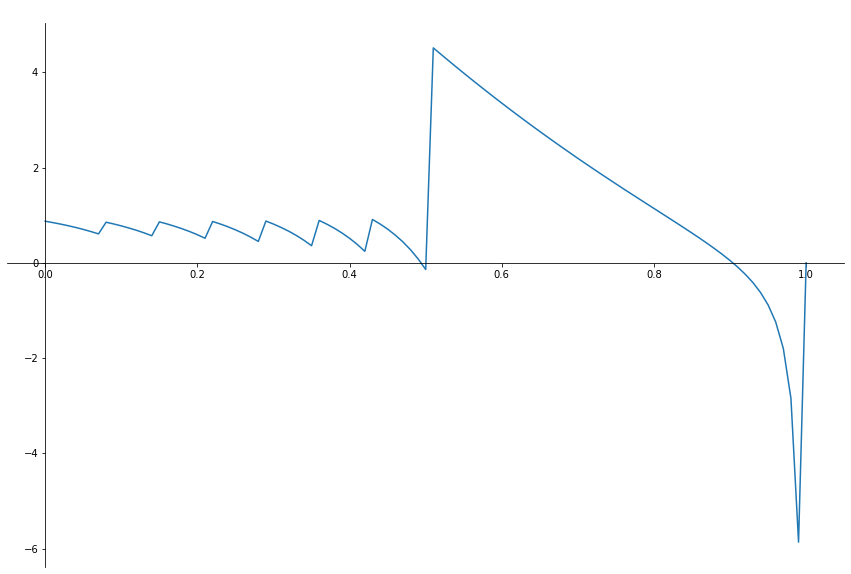

In [ ]:
t = array_v_args
u = array_cur
# y_d1 = np.diff(y,n=1)
# y_d1 = np.true_divide(y_d1,h_x)
yy=np.zeros(len(t))
for i in range(len(t)):
  yy[i]=u[i]

my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))

ax=fig.add_subplot(111)

ax.set_title('  ')
ax.plot(t, yy)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')